Reward Sum on all episodes 0.588
Final Values Q-Table
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


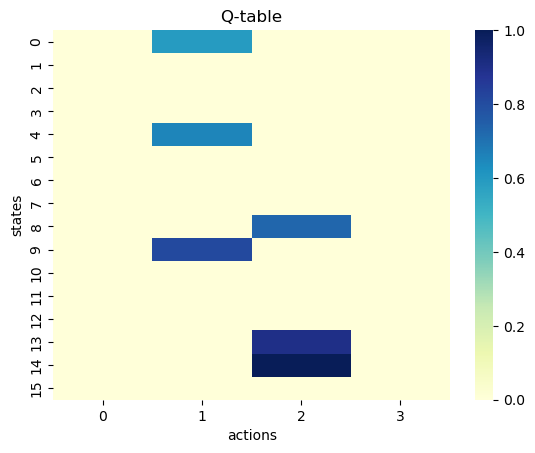

In [16]:
import gymnasium as gym
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Environment and Q-table structure
env = gym.make('FrozenLake8x8-v1',render_mode="rgb_array", map_name="4x4", is_slippery=False)
Q = np.zeros([env.observation_space.n,env.action_space.n])
# env.observation.n, env.action_space.n gives number of states and action in env loaded
# 2. Parameters of Q-learning
eta = .628
gma = .9
epis = 500
rev_list = [] # rewards per episode calculate

# 3. Q-learning Algorithm
for i in range(epis):
    # Reset environment
    s = env.reset()[0]
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        env.render()
        j+=1
        # Choose action from Q table
        a = np.argmax(Q[s, :] + np.random.randn(env.action_space.n)*(1./(i+1)))

        #Get new state & reward from environment
        s1,r,d,_,_ = env.step(a)
        #r -= 0.01

        #If agent falls in a hole, give a penalty of -1
        #if d and r == 0:
        #    r = -1

        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
        
        rAll += r
        s = s1
        
        if d == True:
            break
    
    rev_list.append(rAll)
    env.render()

print("Reward Sum on all episodes " + str(sum(rev_list)/epis))
print("Final Values Q-Table")
print(Q)

# plot Q-table as a heatmap
sns.heatmap(Q, cmap="YlGnBu")
plt.title("Q-table")
plt.xlabel("actions")
plt.ylabel("states")
plt.show()